## Convolutional Neural Networks

CNNs son especialmente útiles para clasificación y reconocimiento de imágenes.

CNN poseen a grandes rasgos dos componentes principales:
    1. Las capas ocultas (feature extraction)
    2. Clasificación
    
![Generator](img/1_NQQiyYqJJj4PSYAeWvxutg.png)

### Feature Extraction

En este componente se realizan operaciones de **convolucion** y **pooling** en las cuales los patrones son detectados.

Si se buscara reconocer una zebra por ejemplo, esta etapa reconocería las rayas, dos oídos y cuatro patas.

#### Convolución

En la convolución se dice que se convoluciona la imagen de entrada con un **kernel** o **filtro** para generar un **feature map**. Para realizar la convolución se mueve el filtro sobre la imagen de entrada multiplicando y sumando el resultado en el *feature map*. 

En la siguiente imágen peude observarse claramente cómo se realiza dicha operación.
![conv](img/1_VVvdh-BUKFh2pwDD0kPeRA@2x.gif)

En la práctica se realizan numerosas convoluciones sobre la entrada usando diferentes filtros. Esto genera numerosos *feature maps* los cuales se los junta para obtener la salida final de la capa de convolución.

#### Función de activación

Como en cualquier otra red neuronal, se usa una **función de activación** para que la salida sea no lineal. Por ejemplo la función ReLU (Rectified Linear Units - https://github.com/Kulbear/deep-learning-nano-foundation/wiki/ReLU-and-Softmax-Activation-Functions)

$$ f(x) = max(x, 0) $$

#### Stride

Stride se le llama al *paso* (cantidad de pixels) que el filtro debe moverse a cada iteración. Usualmente es 1. Aumentando dicho número puede reducirse el overlap.

![stride](img/0_iqNdZWyNeCr5tCkc_.gif)

#### Padding

El tamaño del *feature map* es SIEMPRE menor que el input. Es por eso que se debe usar **padding**.

Una capa de pixels nulos (valor cero) se agrega al input, rodeando al mismo de ceros y aumentando de esa forma su tamaño. De esta forma se logra que no se reduzca el *feature map*. El ejemplo de stride superior incluye un padding representado por los cuadrados de linea punteada.

El padding además, mejora la performance y se asegura que el tamaño del kernel y del stride sean coherentes con la entrada.

#### Pooling

Luego de una capa de convolución, es común agregar una capa de **pooling**. Su función es reducir continuamente las dimensiones reduciendo la complejidad de la red.

Lo mismo decrementa el tiempo de entrenamiento y reduce el overfitting.

##### Max Pooling

El modo más común de pooling se llama **max pooling** el cual toma el máximo valor de cada ventana. En la siguiente figura se muestra un ejemplo de max pooling:

![stride](img/1_vbfPq-HvBCkAcZhiSTZybg.png)

#### Resumen

Al usar una CNN hay 4 hiperparámetros importantes entre los cuales decidir:

1. Kernel size
2. Filter count (cuantos filtros usar)
3. Stride
4. Padding

Visualización de una capa convolucional:

![stride](img/1__34EtrgYk6cQxlJ2br51HQ.gif)

In [ ]:
### Classification

Ocurre luego de las capas de convolución y pooling.

Clasifica como una red convencional sobre los patrones obtenidos.

La parte de clasificación simplemente consiste en una red fully connected convirtiendo la matriz 3D (o 2D si es grayscale) en un vector 1D.

La red se entrena igual que cualquier otra red, usando backpropagation / gradient descent.

# Sobre el problema 
## Tuberculosis
La tuberculosis es una enfermedad infecciosa que pese a estar disminuyendo sigue entrando dentro de las 10 mayores causas de muerte a nivel mundial según la organización mundial de la salud. Que sea una enfermedad infecciosa significa que esta causada por microorganismos como bacterias u hongos, particularmente, la tuberculosis es la enfermedad con mayor cantidad de muertes a nivel mundial de este tipo.
Sus principales síntomas son la toz crónica, con posiblidad de sangre en el esputo, fiebre, sudores nocturnos y perdida de peso. La enfermedad afecta principalmente a los pulmones pero puede propagarse a otros órganos, lo que dificulta su diagnostico.
## Diagnostico
El diagnostico temprano es clave para reducir la mortalidad de la enfermedad por lo que contar con mejores métodos y técnicas más rápidas para el mismo es algo que resultaría extremadamente bueno.
El diagnostico de tuberculosis pulmonar puede ser complicado debido a los sintomás poco especificos y la imposibilidad de aislar los organismos. Las placas de pecho son una de las principales herramientas para el diagnostico de esta enfermedad ya que al ser la tuberculosis una enfermedad infecciosa provoca una inflamación de los ganglios linfáticos en los pulmones.
![stride](img\Tuberculosis-x-ray-1.jpg)
Si bien en la imagen las anormalidades son facilmente distinguibles, esto no siempre es el caso y según un estudio realizado el porcentaje de acierto de medicos en detectar los linfomas inflamados es menor a 70%.
![stride](img\detection_doctor.png)



## Carga de Datos

In [ ]:
def get_train_set(img_width=128, img_height=128):
    if not os.path.exists("data/train"):
        generate_train_set(img_width, img_height)
    with open("data/train", 'rb') as fp:
        train_set = pickle.load(fp)
    with open("data/train_labels", 'rb') as fp:
        train_labels = pickle.load(fp)
    return train_set, train_labels

In [ ]:
def generate_train_set(img_width=128, img_height=128):
    images = get_images(img_width=img_width, img_height=img_height)
    labels = get_labels()
    train_set_percentage = 0.8  # Cuanto porcentaje de las imágenes uso para el train set.
    # normal_cases = [img for i, img in enumerate(images) if labels[i] == 0]
    # ptb_cases = [img for i, img in enumerate(images) if labels[i] == 1]
    train_set = []
    train_labels = []
    test_set = []
    test_labels = []
    for i, c in enumerate(images):
        if uniform(0, 1) > train_set_percentage:
            test_set.append(c)
            test_labels.append(labels[i])
        else:
            train_set.append(c)
            train_labels.append(labels[i])
    with open("data/train", 'wb') as fp:
        pickle.dump(train_set, fp)
    with open("data/test", 'wb') as fp:
        pickle.dump(test_set, fp)
    with open("data/train_labels", 'wb') as fp:
        pickle.dump(train_labels, fp)
    with open("data/test_labels", 'wb') as fp:
        pickle.dump(test_labels, fp)

In [ ]:
def save_images(imgs_dir='data/ChinaSet_AllFiles/CXR_png/', img_width=128, img_height=128):
    extensions = {".jpg", ".png", ".gif"}  # etc
    # make sure the file is a image
    imgs_files = [f for f in os.listdir(imgs_dir) if any(f.endswith(ext) for ext in extensions)]
    images = []
    for f in imgs_files:
        # print(f)
        img = cv2.imread(os.path.join(imgs_dir, f), cv2.IMREAD_GRAYSCALE)        # img.shape ~ (3000, 3000)
        img = cv2.resize(img, (img_width, img_height))
        images.append(img) 
    with open("data/images", 'wb') as fp:
        pickle.dump(images, fp)

# Dataset ##
El dataset usado para este trabajo cuenta con 662 imagenes anotadas con aproximadamente mitad de las imagenes presentando anomalías y mitad de las imagenes conteniendo pulmones sanos.

<td> <img src="img/CHNCXR_0448_1.png" alt="Drawing" style="width: 400px;" /> </td>

Si bien las imagenes originales tenían componentes de color  en RGB fueron pasadas a escala de grises ya que la radiografia es monocromática.
### Resolución 
Ya que las imagenes tenían una resolución ampliamente mayor a la necesitada se redujo la misma hasta 128 pixeles para ganar velocidad de procesamiento. Como se puede ver en la imagen la performance de la red no cambia sustancialmente usando 300px o 128 px.
![stride](img\resolucion.png)




# El Modelo utilizado#

Si bien se realizaron pruevas con diferentes numeros de capas y diferentes configuraciones de regularización el modelo utilizado es aproximadamente el siguiente:

In [ ]:
model.add(layers.Conv2D(layer_C1, (3, 3), input_shape=(img_width, img_height, 1)))  # the 1 is because greyscale (1 chan)
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))


model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(droput_L1))


model.add(layers.Conv2D(layer_C2, (3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))


model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(droput_L2))


model.add(layers.Conv2D(layer_C3, (3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(dropout_L2))
model.add(layers.Dense(dense_layer))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))

model.add(layers.Dense(1))
model.add(layers.BatchNormalization())
model.add(layers.Activation("sigmoid"))

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(lr=0.00001, beta_1=0.9999, beta_2=0.999, epsilon=None, decay=0.0),
    metrics=['acc'])

![stride](img\graph.png)

# Hiperparametros a encontrar
Los parámetros configurables para los cuales buscamos los valores óptimos son los siquientes:
- Cantidad de capas
- Tamaño de las capas
- Capas de pooling
- Regularización
- Tamaño de los kernels

Para aislar cada parámetro se realizaron pruebas manteniendo constante todos los restantes
## Cantidad de capas 
![stride](img\capas.png)
Como se puede ver en la imagen los mejores resultados fueron obtenidos usando solamente dos capas convolucionales en la red, la razón puede deberse a que teniendo un dataset reducido evita el overfitting de mejor manera tener una menor cantidad de parámetros.
## Tamaño de las capas
Como se puede ver en la imagen los tamaños de capas más reducidos logran un mejor desempeño, nuevamente la razón puede ser el dataset reducido y el overfitting.
![stride](img\tamaños.png)
## Pooling
Las capas de pooling pese a disminuir el tiempo de computo de forma notable, terminaron empeorando la performance de la red.
![stride](img\pooling.png)


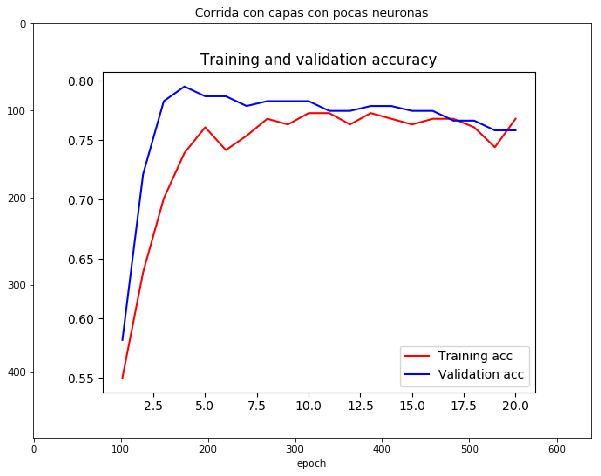